## Metrics

汇总常见2分类的指标，例如: AUC，ROC曲线，ACC, 敏感性， 特异性，精确度，召回率，PPV, NPV, F1

具体的介绍，可以参考一下：https://blog.csdn.net/sunflower_sara/article/details/81214897

In [1]:
import os
from datetime import datetime
from onekey_algo import get_param_in_cwd

os.makedirs('img', exist_ok=True)
os.makedirs('results', exist_ok=True)
# 模型日志位置，如果没有更改默认保存位置，并且模型是当天训练出来的，可以不动这个参数。
model_root = get_param_in_cwd('model_root')

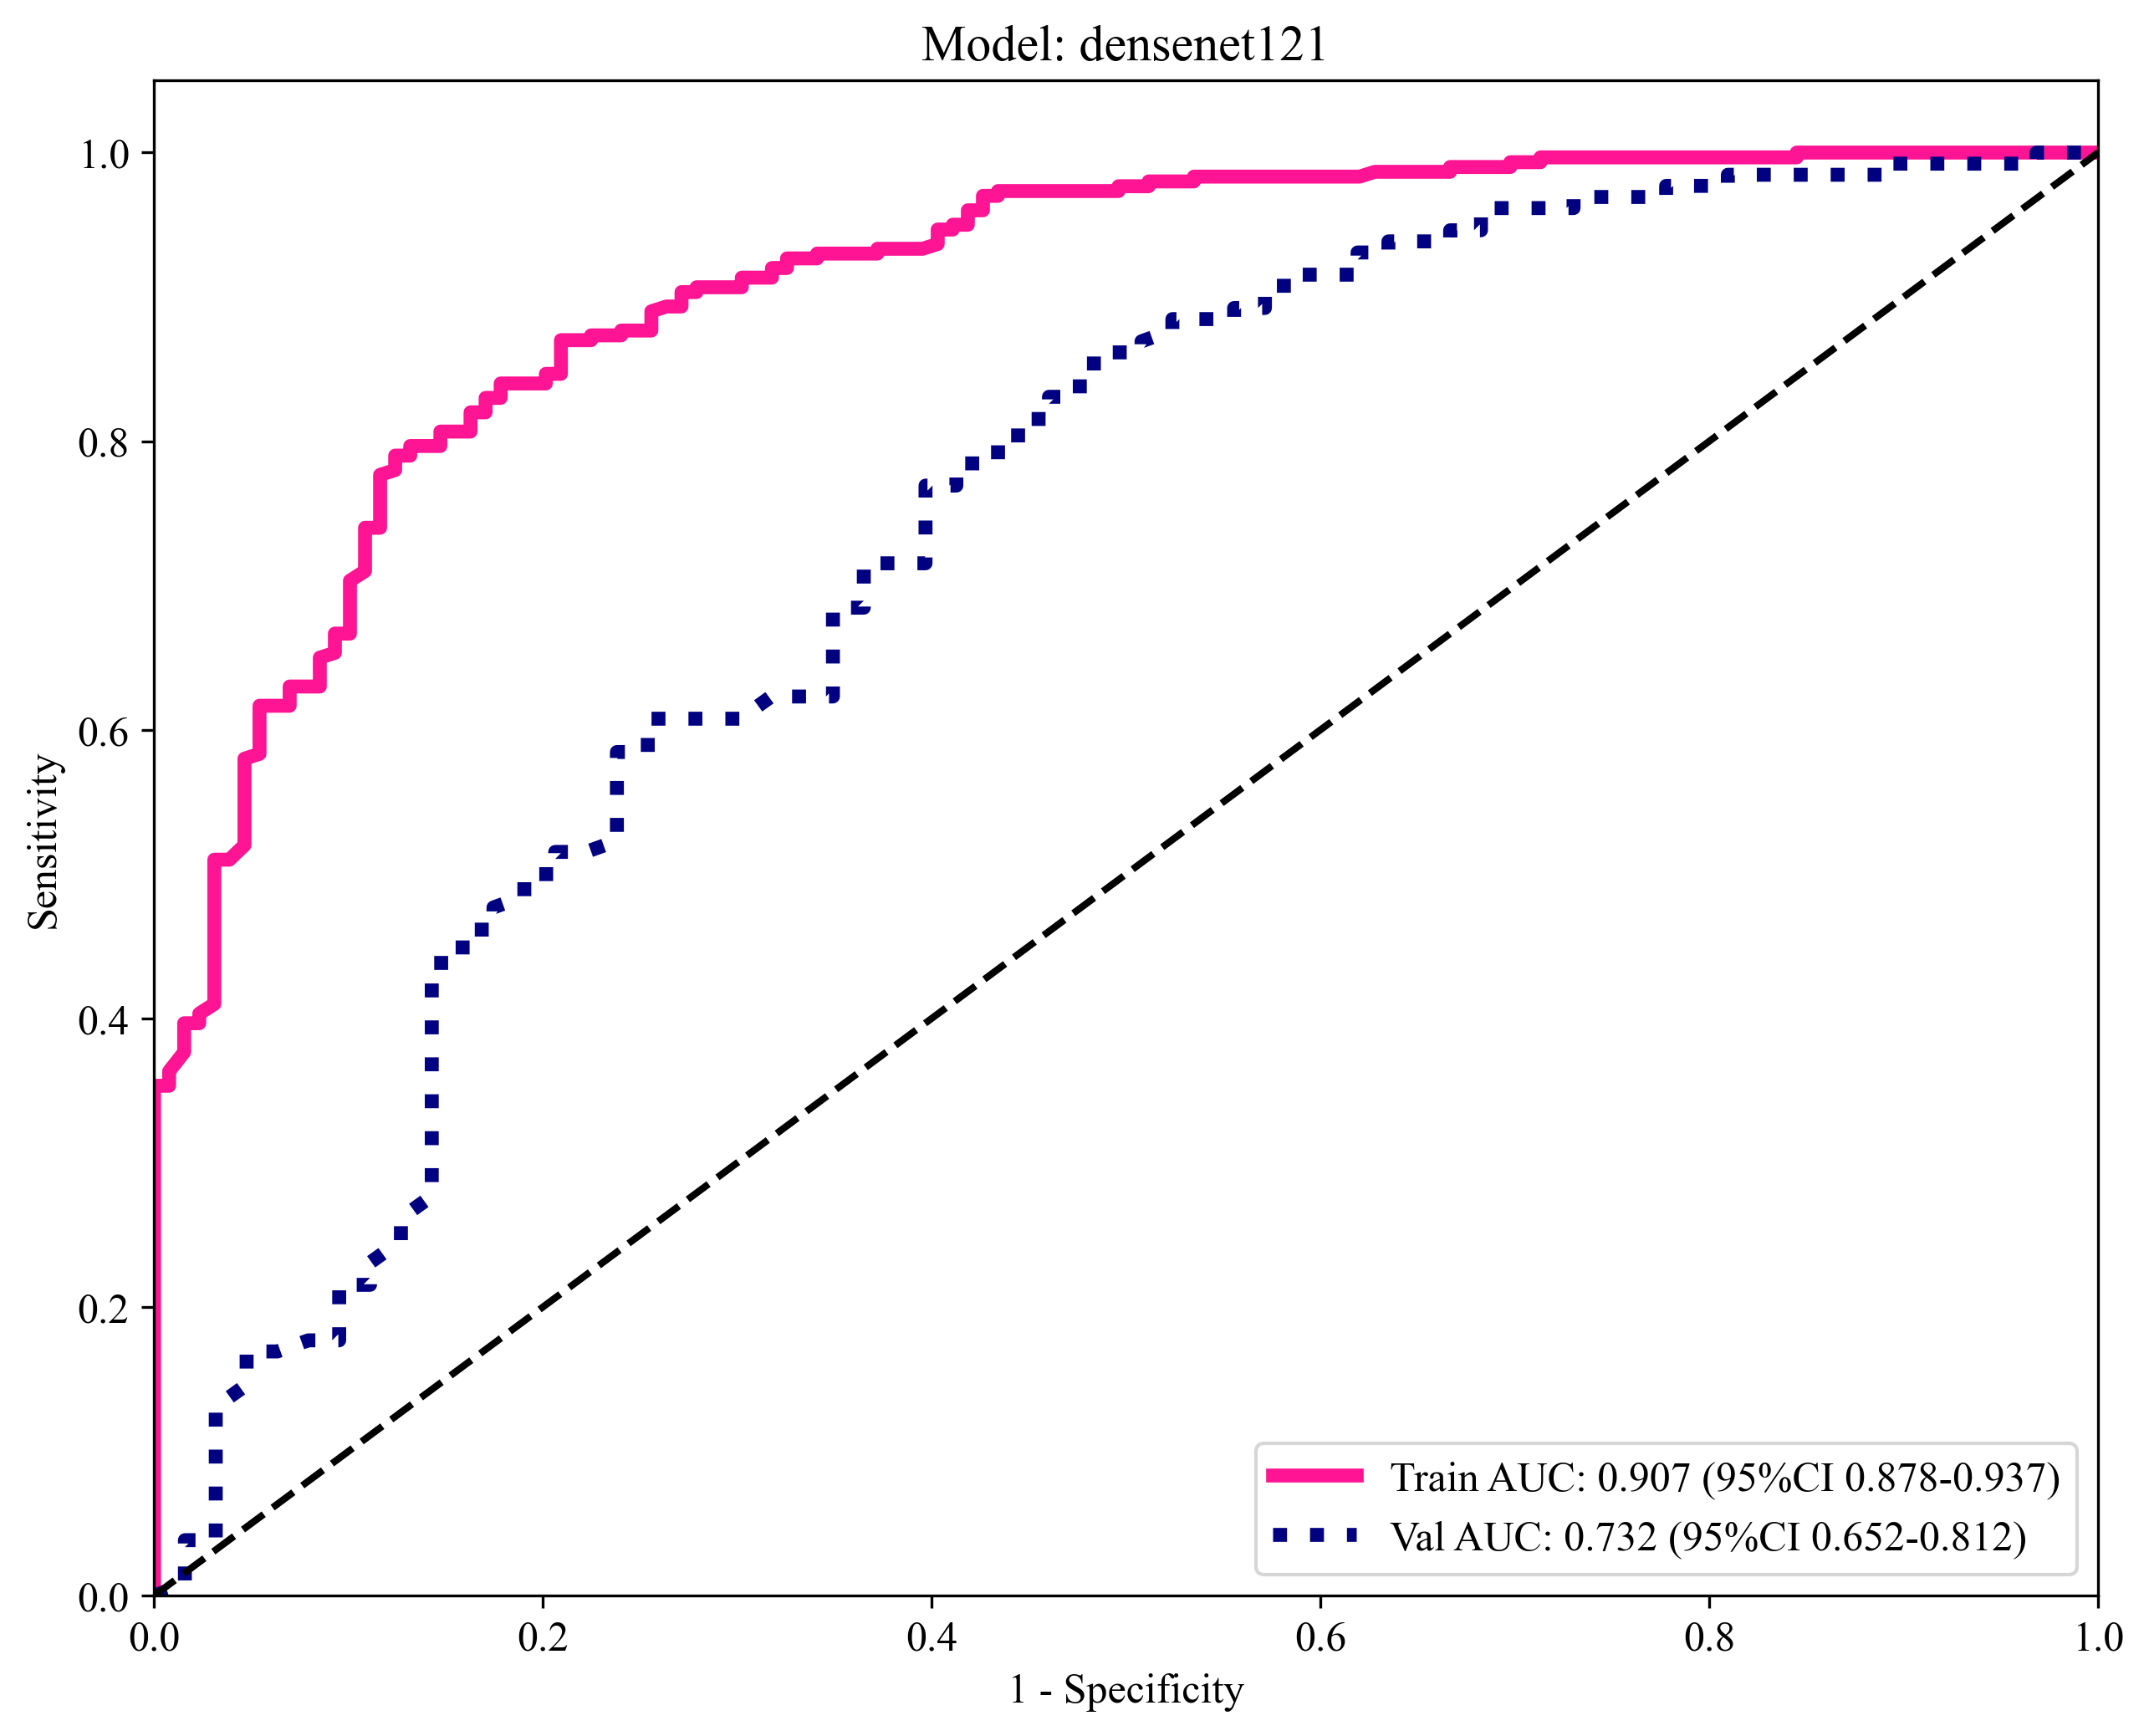

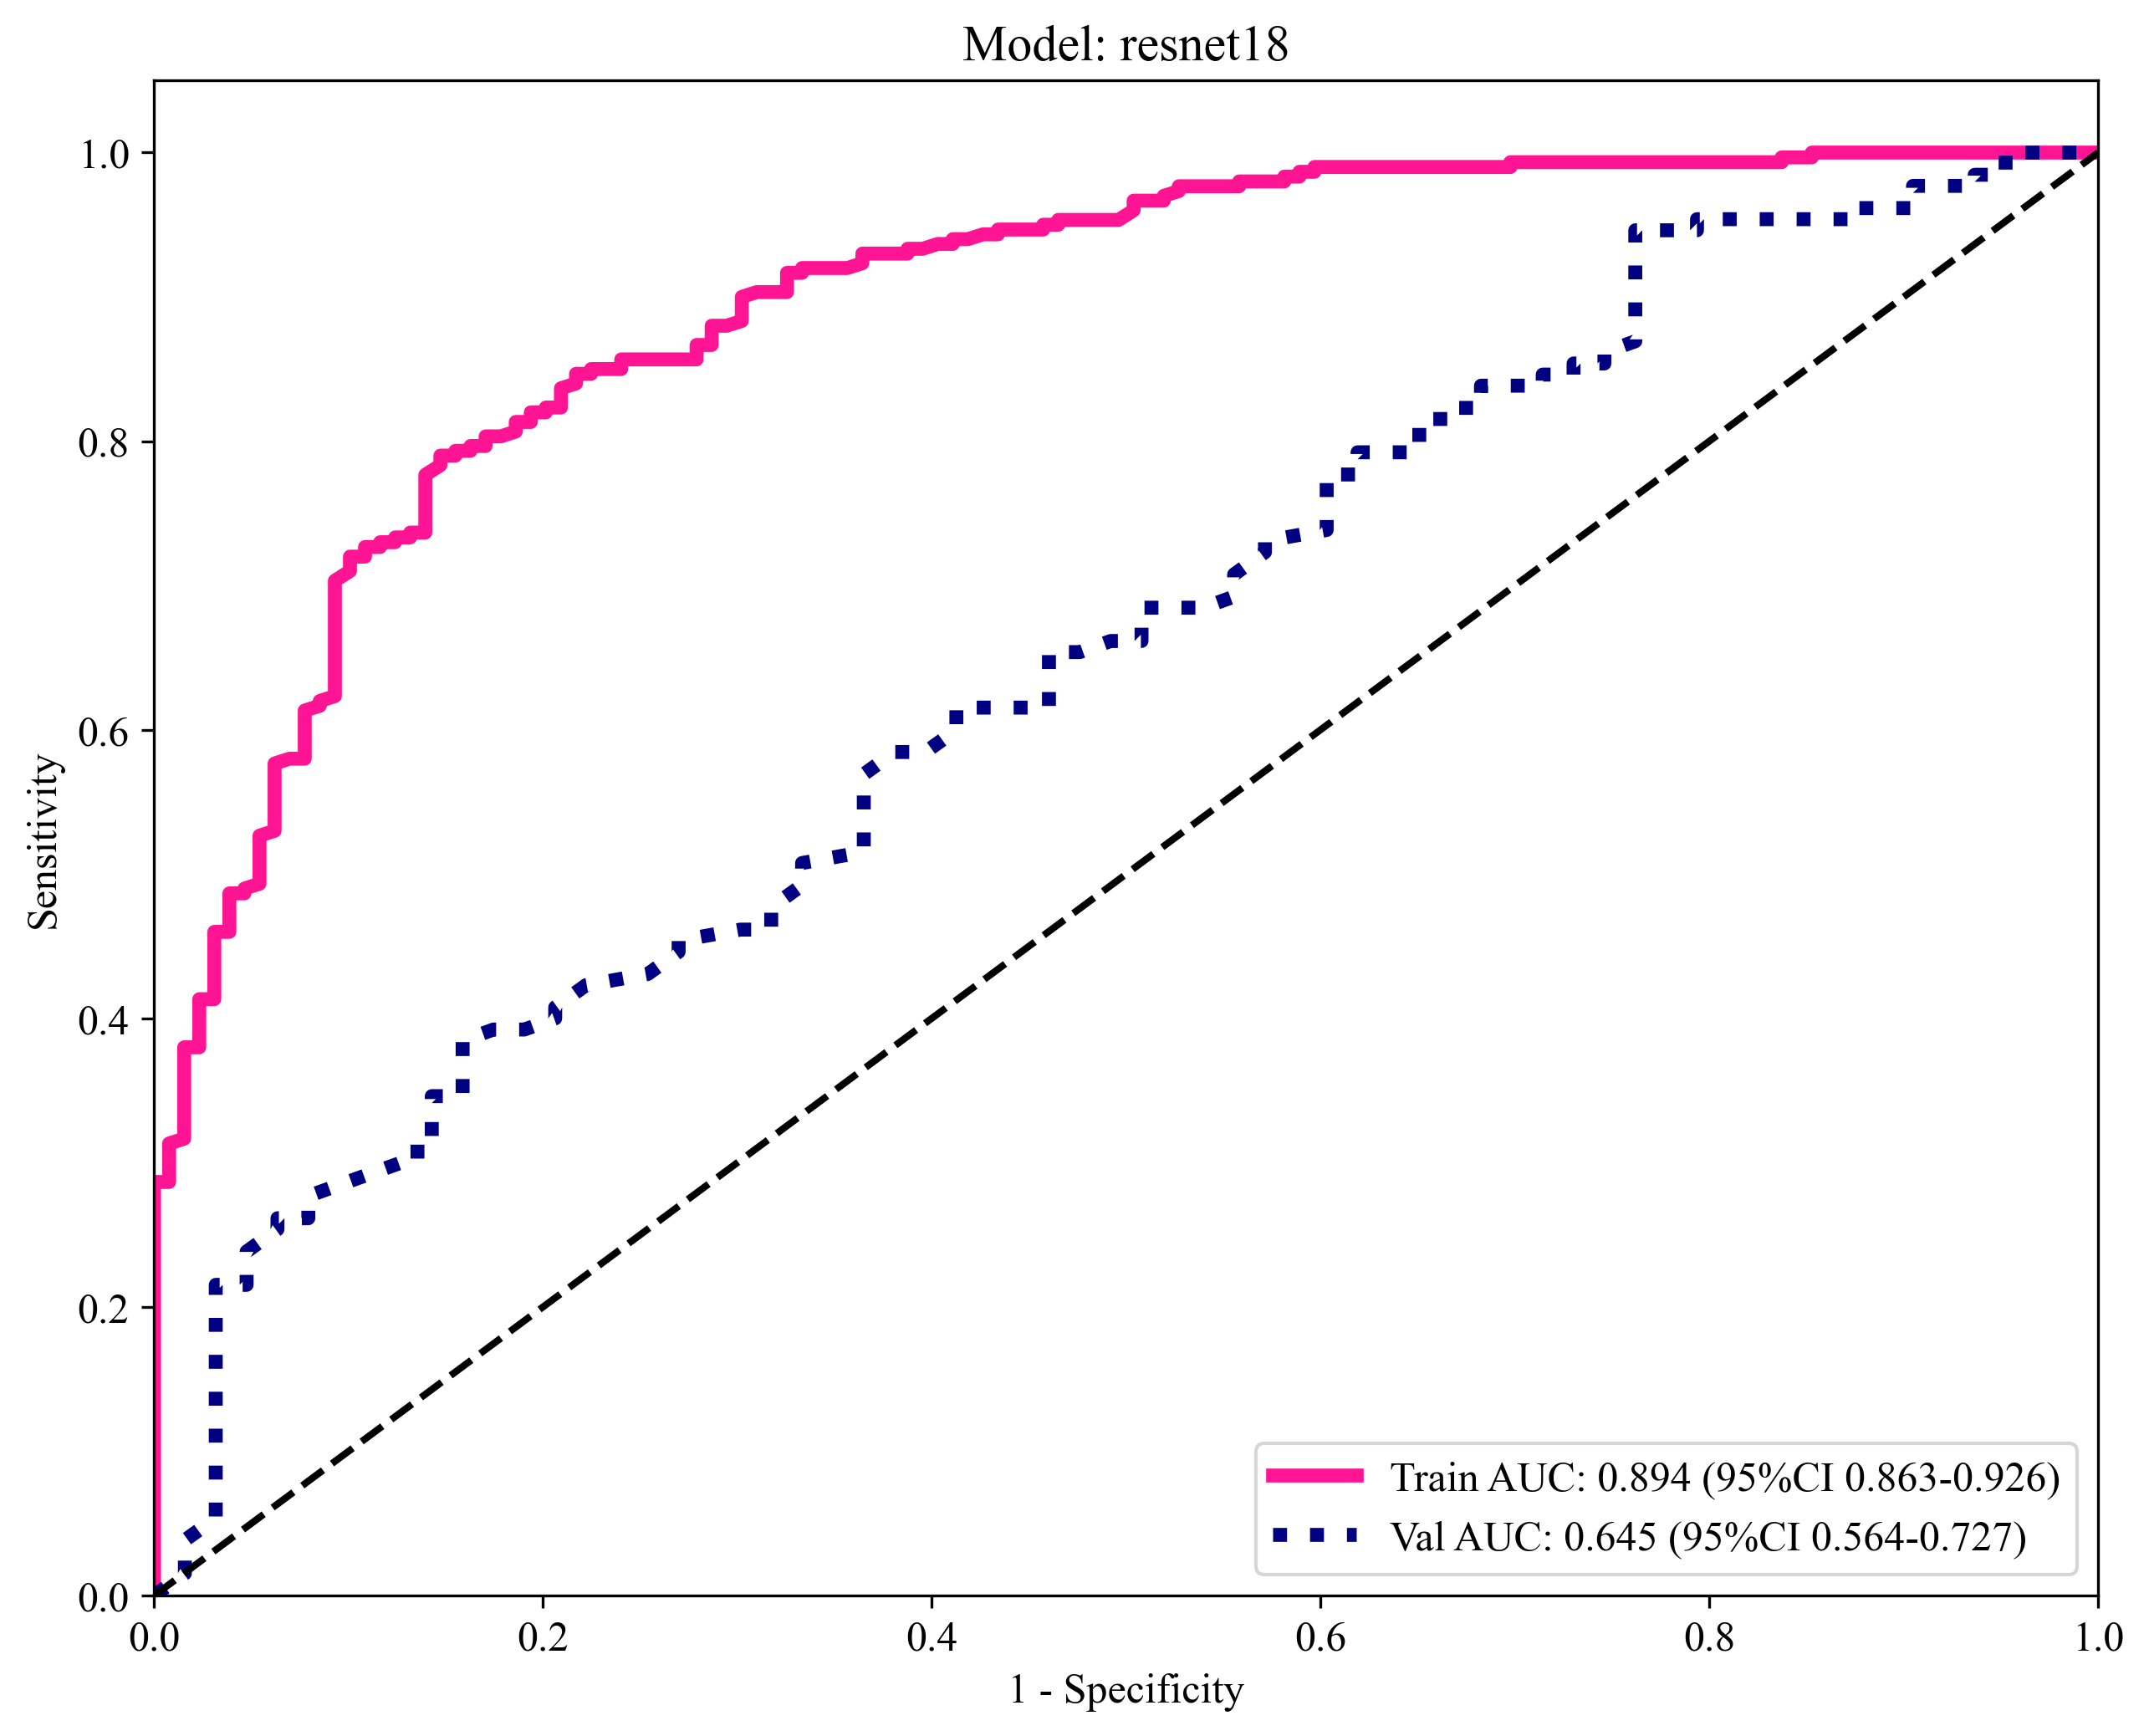

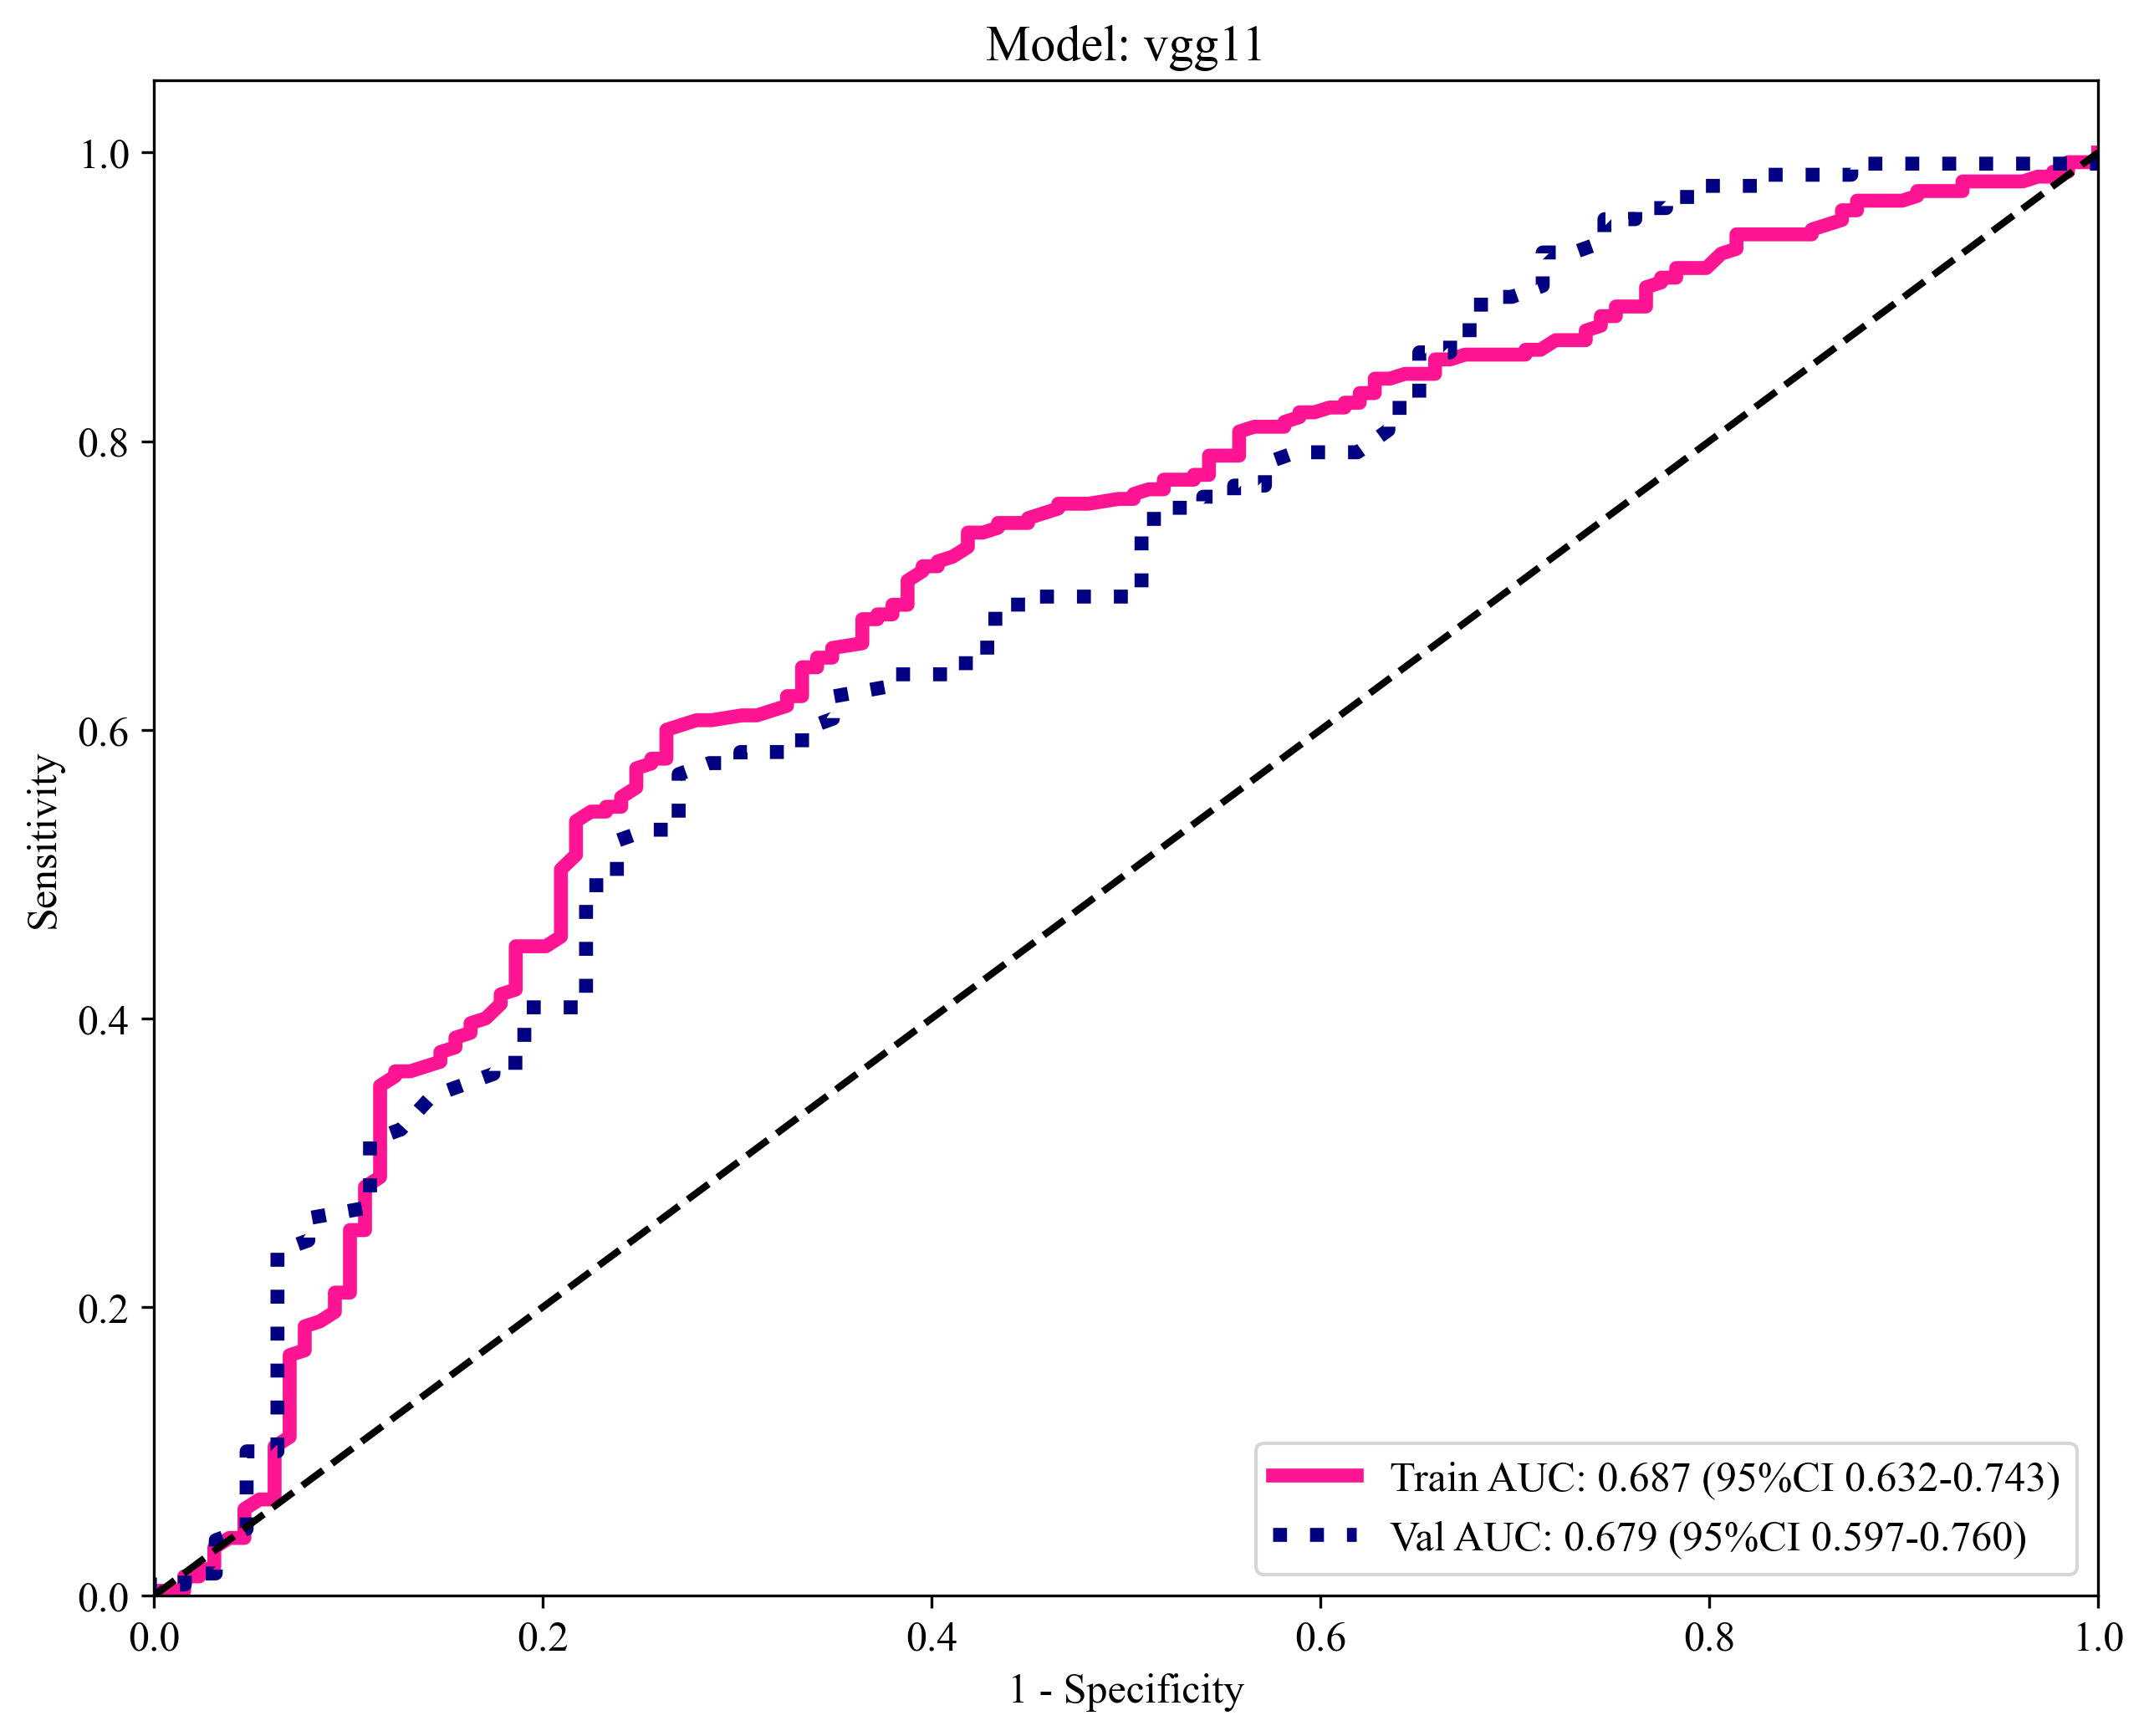

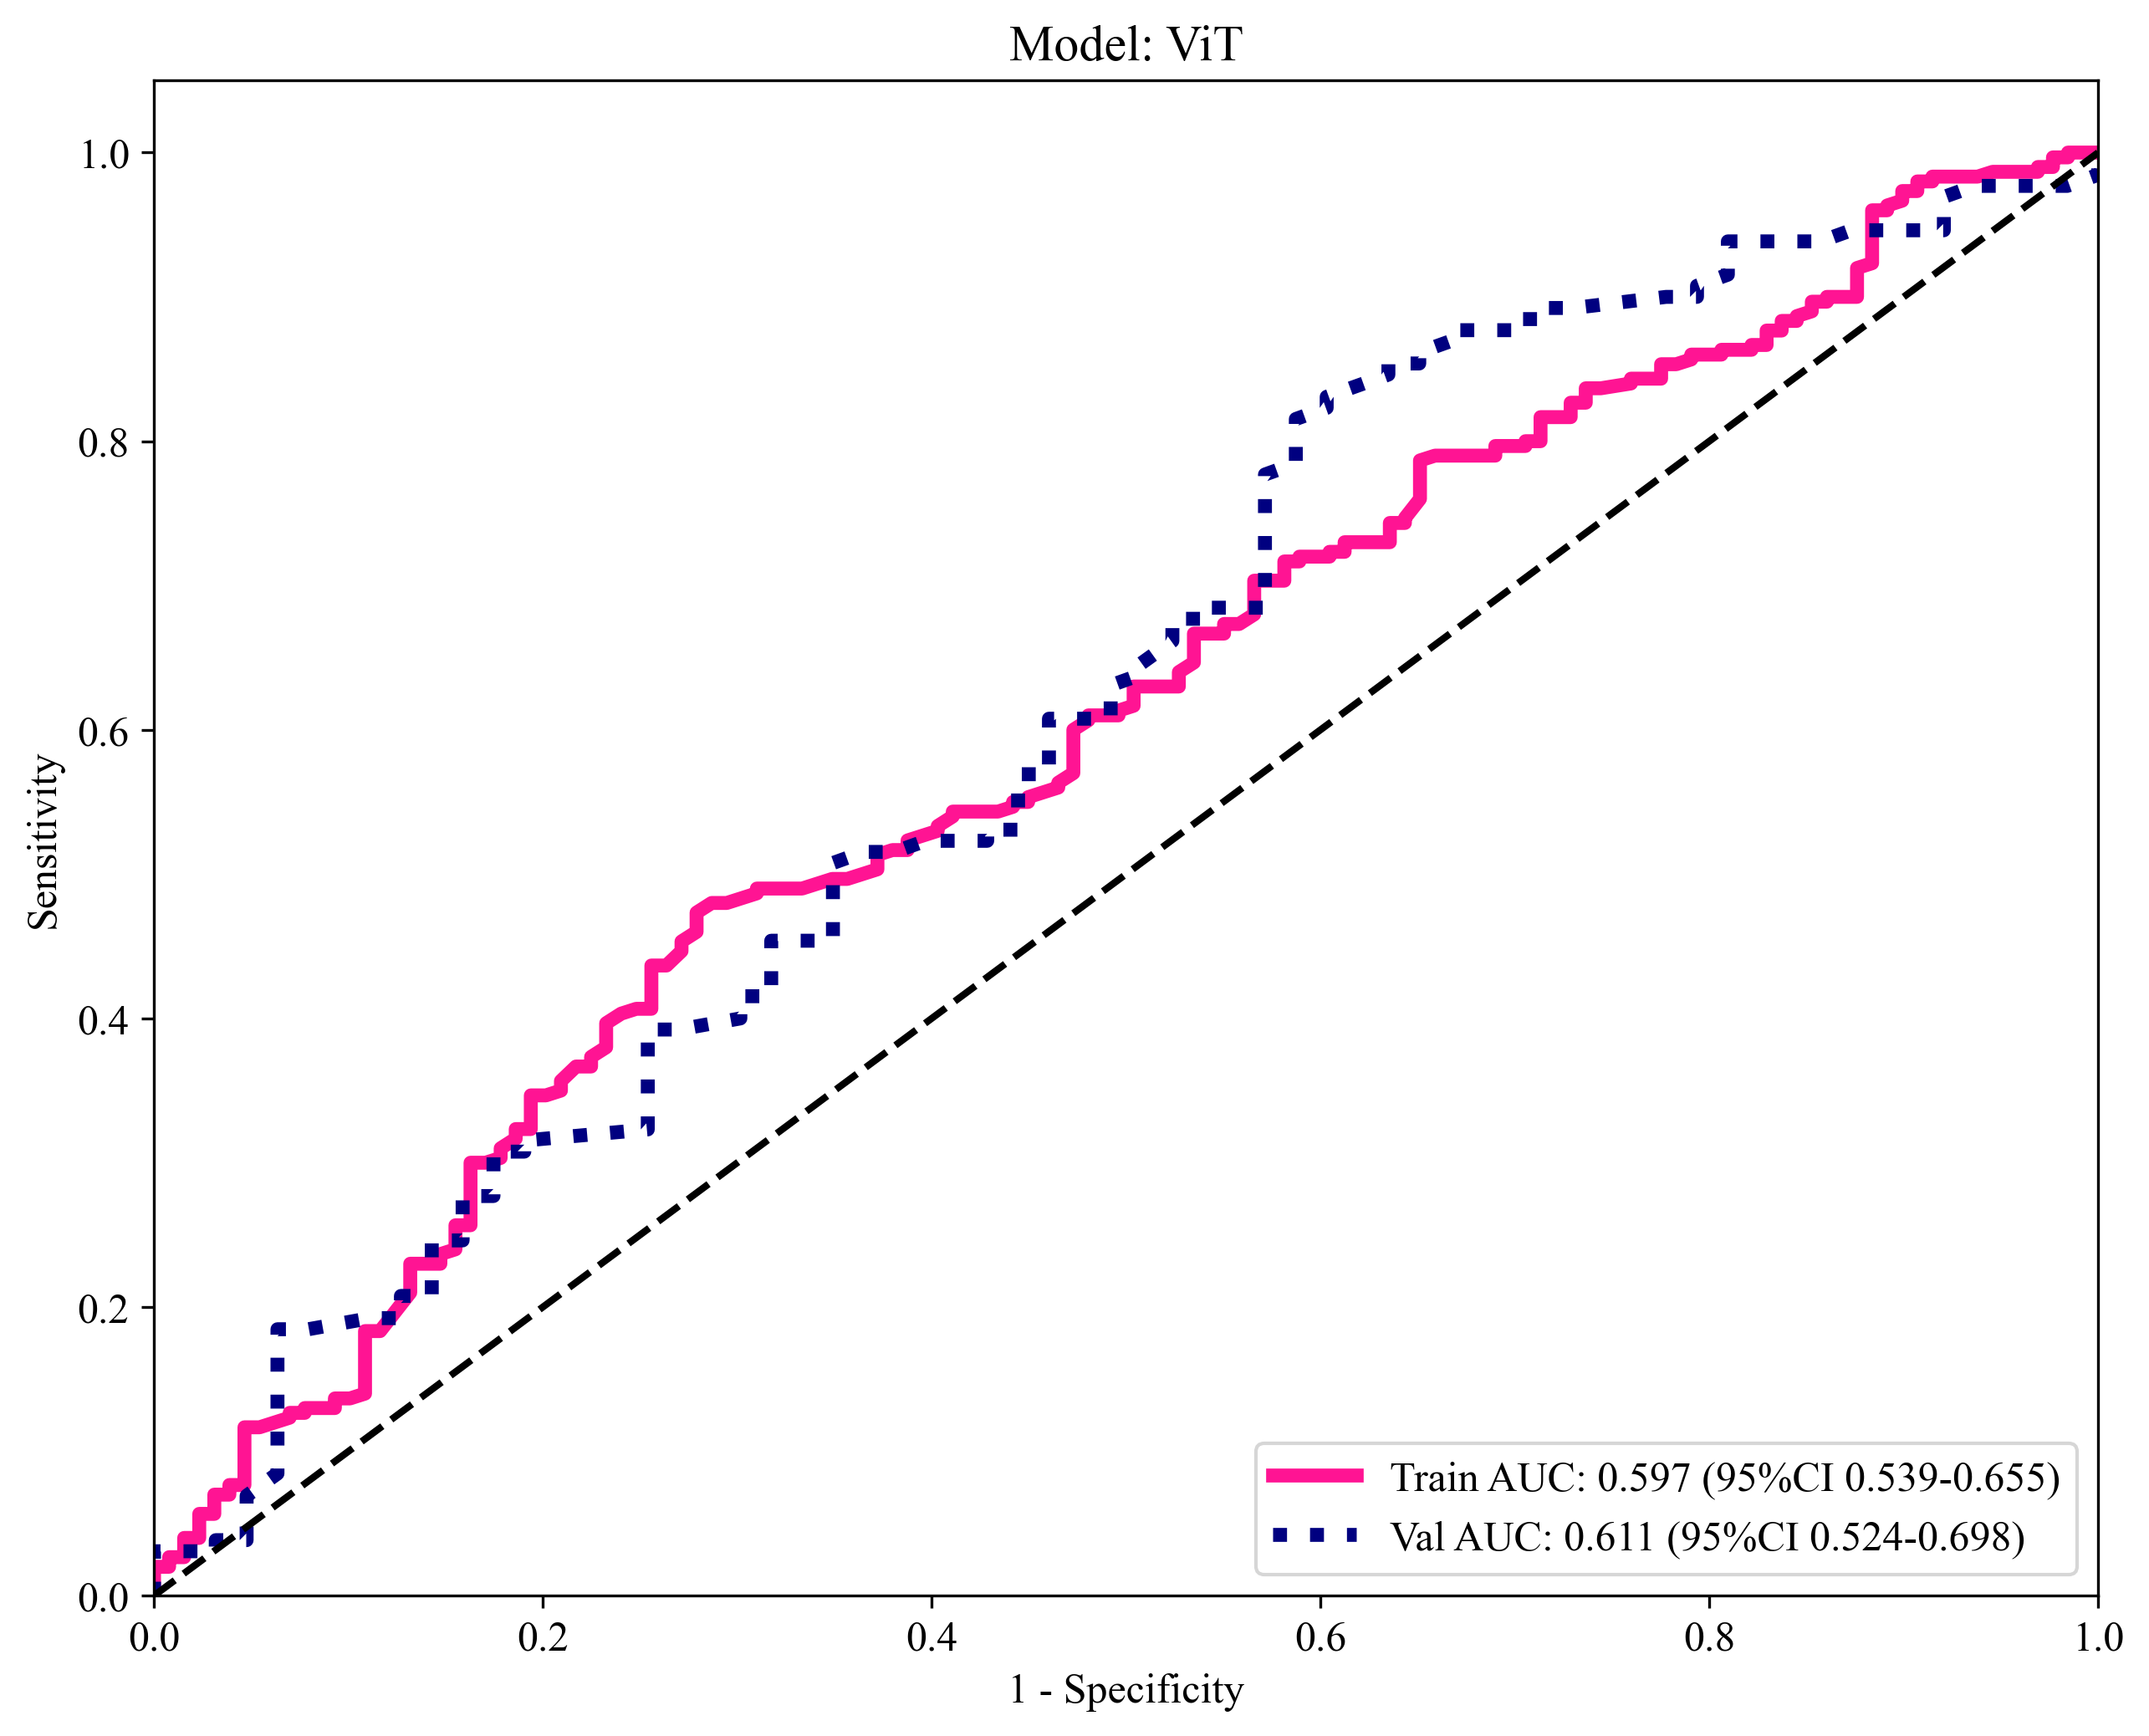

In [2]:
import pandas as pd
import numpy  as np
from onekey_algo.custom.components import metrics
from onekey_algo.custom.components.comp1 import draw_roc
from matplotlib import pyplot as plt

# log_path 修改为Onekey val目录中对应的log文件。
metric_results = []
all_predict_scores = []
all_gts = []
for model in os.listdir(model_root):
    all_pred = []
    all_gt = []
    for subset in ['Train', 'Test']:
        cohort = 'TRAIN' if subset == 'Train' else 'VAL'
        log_path = os.path.join(model_root, model, f"viz/BST_{cohort}_RESULTS.txt")
        val_log = pd.read_csv(log_path, names=['fname', 'pred_score', 'pred_label', 'gt'], sep='\t')
        ul_labels = np.unique(val_log['pred_label'])
        
        for ul in [1]:
            pred_score = list(map(lambda x: x[0] if x[1] == ul else 1-x[0], np.array(val_log[['pred_score', 'pred_label']])))
            gt = [1 if gt_ == ul else 0 for gt_ in np.array(val_log['gt'])]
            acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = metrics.analysis_pred_binary(gt, pred_score, use_youden=False)
            ci = f"{ci[0]:.4f}-{ci[1]:.4f}"
            metric_results.append([model, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, subset])
            all_pred.append(np.array(list(map(lambda x: (1-x[0], x[0]) if x[1] == 1 else (x[0], 1-x[0]), 
                                          np.array(val_log[['pred_score', 'pred_label']])))))
            all_gt.append(gt)
    all_predict_scores.extend(all_pred)
    all_gts.extend(all_gt)
    draw_roc(all_gt, all_pred, labels=['Train', 'Val'], title=f"Model: {model}")
    plt.savefig(f'img/DTL_{model}_roc.svg', bbox_inches='tight')
    plt.show()
metrics = pd.DataFrame(metric_results, 
             columns=['ModelName', 'Acc', 'AUC', '95% CI', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                      'Precision', 'Recall', 'F1', 'Threshold', 'Cohort'])

In [3]:
val_log

,fname,pred_score,pred_label,gt
0,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.724,1,1
1,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.689,1,1
2,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.659,1,0
3,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.549,0,1
4,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.580,1,1
...,...,...,...,...
188,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.536,1,1
189,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.606,0,0
190,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.501,0,1
191,E:\\111thymus\\thymus_habitat\\sol8. 深度（迁移）学习-...,0.643,1,1


In [4]:
pred_score

[0.724,
 0.689,
 0.659,
 0.45099999999999996,
 0.58,
 0.369,
 0.527,
 0.538,
 0.593,
 0.695,
 0.754,
 0.753,
 0.513,
 0.577,
 0.584,
 0.545,
 0.561,
 0.622,
 0.802,
 0.683,
 0.576,
 0.572,
 0.549,
 0.561,
 0.668,
 0.492,
 0.624,
 0.42100000000000004,
 0.648,
 0.45099999999999996,
 0.545,
 0.515,
 0.673,
 0.525,
 0.476,
 0.571,
 0.487,
 0.45299999999999996,
 0.733,
 0.497,
 0.734,
 0.578,
 0.758,
 0.489,
 0.673,
 0.62,
 0.645,
 0.41700000000000004,
 0.708,
 0.666,
 0.59,
 0.623,
 0.708,
 0.641,
 0.694,
 0.469,
 0.64,
 0.527,
 0.739,
 0.587,
 0.712,
 0.42900000000000005,
 0.598,
 0.43300000000000005,
 0.672,
 0.683,
 0.577,
 0.786,
 0.549,
 0.492,
 0.577,
 0.711,
 0.43200000000000005,
 0.565,
 0.544,
 0.62,
 0.738,
 0.588,
 0.579,
 0.659,
 0.703,
 0.542,
 0.735,
 0.712,
 0.43500000000000005,
 0.521,
 0.624,
 0.605,
 0.685,
 0.696,
 0.616,
 0.609,
 0.518,
 0.43500000000000005,
 0.631,
 0.575,
 0.586,
 0.556,
 0.672,
 0.715,
 0.666,
 0.56,
 0.674,
 0.652,
 0.582,
 0.735,
 0.661,
 0.72,
 0.

In [5]:
ul_labels

array([0, 1], dtype=int64)

In [6]:
metrics

,ModelName,Acc,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Precision,Recall,F1,Threshold,Cohort
0,densenet121,0.844,0.907,0.8776-0.9367,0.930,0.643,0.858,0.798,0.858,0.930,0.893,0.712,Train
1,densenet121,0.751,0.732,0.6516-0.8115,0.938,0.365,0.753,0.742,0.753,0.938,0.836,0.703,Test
2,resnet18,0.839,0.894,0.8625-0.9264,0.900,0.698,0.874,0.750,0.874,0.900,0.887,0.670,Train
3,resnet18,0.710,0.645,0.5637-0.7266,0.954,0.206,0.713,0.684,0.713,0.954,0.816,0.944,Test
4,vgg11,0.706,0.687,0.6318-0.7427,0.917,0.217,0.731,0.528,0.731,0.917,0.814,0.722,Train
5,vgg11,0.725,0.679,0.5967-0.7603,0.977,0.206,0.718,0.812,0.718,0.977,0.827,0.796,Test
6,ViT,0.660,0.597,0.5390-0.6549,0.867,0.178,0.710,0.365,0.710,0.867,0.781,0.773,Train
7,ViT,0.689,0.611,0.5243-0.6980,0.885,0.286,0.719,0.545,0.719,0.885,0.793,0.537,Test


In [7]:
# metrics.to_csv(r'E:\111thymus\thymus深度学习project\ROC汇总\效能评估_summary.csv', index=False)

# 保存预测结果

将深度学习的预测结果，保存中与组学的预测结果相同的格式，f1便后续进行汇总。

In [8]:
for model in os.listdir(model_root):
    log_path = os.path.join(model_root, model, "viz/BST_{subset}_RESULTS.txt")
    train_ = pd.read_csv(log_path.format(subset='TRAIN'), names=['fname', 'pred_score', 'pred_label', 'gt'], sep='\t')
    train_['group'] = 'train'
    val_ = pd.read_csv(log_path.format(subset='VAL'), names=['fname', 'pred_score', 'pred_label', 'gt'], sep='\t')
    val_['group'] = 'test'
    data = pd.concat([train_, val_], axis=0)

    predict = []
    for idx, row in data.iterrows():
        predict.append([row['fname'].replace('.png', '.gz'), 
                        row['pred_score'] if row['pred_label'] == 0 else 1 - row['pred_score'],
                        row['pred_score'] if row['pred_label'] == 1 else 1 - row['pred_score'],
                        row['group']])
    predict = pd.DataFrame(predict, columns=['ID', 'label-0', 'label-1', 'group'])
    predict['ID'] = predict['ID'].map(lambda x: os.path.basename(x))
    predict[predict['group'] == 'train'][['ID', 'label-0', 'label-1']].to_csv(f'results/DTL_{model}_train.csv', index=False)
    predict[predict['group'] == 'test'][['ID', 'label-0', 'label-1']].to_csv(f'results/DTL_{model}_test.csv', index=False)
    predict